## Read Result


In [4]:
import pickle
import operator    
import re
import numpy as np
import matplotlib.pyplot as plt


###  RSF

#### reduced


In [131]:
n_components = 25
RSF_reduced_n_trees = [50]

with open('RSF_results/RSF_P_01.pickle', 'rb') as f:
    result = pickle.load(f)
    RSF_reduced_max_features = result[0]
    RSF_reduced_max_depths = result[1]
    RSF_reduced_result = result[2:]


In [135]:
RSF_reduced_dict = {}
for n_tree in RSF_reduced_n_trees:
    for row, max_feature in enumerate(RSF_reduced_max_features):
        for col, max_depth in enumerate(RSF_reduced_max_depths):
            RSF_reduced_dict[(n_tree, max_feature, max_depth)] = {
                "conc_PAN": RSF_reduced_result[0]["pancreatitis"][row][col],
                "conc_ICH": RSF_reduced_result[0]["ich"][row][col],
                "ipec_PAN": RSF_reduced_result[1]["pancreatitis"][row][col],
                "ipec_ICH": RSF_reduced_result[1]["ich"][row][col]                
            }
                
RSF_reduced_PAN_concordance_best = max(RSF_reduced_dict.items(), key=lambda x:x[1]["conc_PAN"])
RSF_reduced_ICH_concordance_best = max(RSF_reduced_dict.items(), key=lambda x:x[1]["conc_ICH"])
RSF_reduced_PAN_IPEC_best = min(RSF_reduced_dict.items(), key=lambda x:x[1]["ipec_PAN"])
RSF_reduced_ICH_IPEC_best = min(RSF_reduced_dict.items(), key=lambda x:x[1]["ipec_ICH"])

print("RSF reduced - PAN:")
print("best on concordance:")
print("n_tree, max_feature, max_depth:", RSF_reduced_PAN_concordance_best[0], "| concordance:", RSF_reduced_PAN_concordance_best[1]["conc_PAN"])
print("best on IPEC:")
print("n_tree, max_feature, max_depth:", RSF_reduced_PAN_IPEC_best[0], "| IPEC:", RSF_reduced_PAN_IPEC_best[1]["ipec_PAN"])
print()
print("RSF reduced - ICH:")
print("best on concordance:")
print("n_tree, max_feature, max_depth:", RSF_reduced_ICH_concordance_best[0], "| concordance:", RSF_reduced_ICH_concordance_best[1]["conc_ICH"])
print("best on IPEC:")
print("n_tree, max_feature, max_depth:", RSF_reduced_ICH_IPEC_best[0], "| IPEC:", RSF_reduced_ICH_IPEC_best[1]["ipec_ICH"])


RSF reduced - PAN:
best on concordance:
n_tree, max_feature, max_depth: (50, 20, 3) | concordance: 0.5730704665704667
best on IPEC:
n_tree, max_feature, max_depth: (50, 20, 3) | IPEC: 1.9541753518974598

RSF reduced - ICH:
best on concordance:
n_tree, max_feature, max_depth: (50, 40, 6) | concordance: 0.5952223771348901
best on IPEC:
n_tree, max_feature, max_depth: (50, 80, 6) | IPEC: 1.7582790761672764


#### without reduction


In [95]:
RSF_n_trees = [20, 50]
RSF_max_features = [10, 20, 40, 60, 80, 200]
RSF_max_depths = [5, 10, 15]
RSF_dict = {}

with open('RSF_results/RSF.out', 'r') as f:
    dataset = 'PAN'
    n_tree = 20
    max_feature = 10
    max_depth = 5
    for line in f:
        if re.match(r'For the ich dataset:', line):
            dataset = 'ICH'
            continue
        if re.match(r'\[LOG\] n_tree', line):
            tokens = line.split(" = ")
            n_tree = int(tokens[1].split(",")[0])
            max_feature = int(tokens[2].split(",")[0])
            max_depth = int(tokens[3].split("\n")[0])
            if (n_tree, max_feature, max_depth) not in RSF_dict:
                RSF_dict[(n_tree, max_feature, max_depth)] = {}
        if re.match(r'\[LOG\] avg\. concordance', line):
            concordance = float(line.split(": ")[1])
            RSF_dict[(n_tree, max_feature, max_depth)]["conc_" + dataset] = concordance
        if re.match(r'\[LOG\] avg\. ipec', line):
            ipec_score = float(line.split(": ")[1])
            RSF_dict[(n_tree, max_feature, max_depth)]["ipec_" + dataset] = ipec_score
 

In [96]:
RSF_PAN_concordance_best = max(RSF_dict.items(), key=lambda x:x[1]["conc_PAN"])
RSF_ICH_concordance_best = max(RSF_dict.items(), key=lambda x:x[1]["conc_ICH"])
RSF_PAN_IPEC_best = min(RSF_dict.items(), key=lambda x:x[1]["ipec_PAN"])
RSF_ICH_IPEC_best = min(RSF_dict.items(), key=lambda x:x[1]["ipec_ICH"])

print("RSF reduced - PAN:")
print("best on concordance:")
print("n_tree, max_feature, max_depth:", RSF_PAN_concordance_best[0], "| concordance:", RSF_PAN_concordance_best[1]["conc_PAN"])
print("best on IPEC:")
print("n_tree, max_feature, max_depth:", RSF_PAN_IPEC_best[0], "| IPEC:", RSF_PAN_IPEC_best[1]["ipec_PAN"])
print()
print("RSF reduced - ICH:")
print("best on concordance:")
print("n_tree, max_feature, max_depth:", RSF_ICH_concordance_best[0], "| concordance:", RSF_ICH_concordance_best[1]["conc_ICH"])
print("best on IPEC:")
print("n_tree, max_feature, max_depth:", RSF_ICH_IPEC_best[0], "| IPEC:", RSF_ICH_IPEC_best[1]["ipec_ICH"])


RSF reduced - PAN:
best on concordance:
n_tree, max_feature, max_depth: (50, 20, 10) | concordance: 0.559587542087542
best on IPEC:
n_tree, max_feature, max_depth: (50, 40, 5) | IPEC: 0.18194392586255279

RSF reduced - ICH:
best on concordance:
n_tree, max_feature, max_depth: (20, 10, 5) | concordance: 0.586682119205298
best on IPEC:
n_tree, max_feature, max_depth: (20, 80, 5) | IPEC: 0.18125757444497248


## New Results


### Pancreatitis and Ich


In [183]:
MODEL = "AAM"
REDUCED = "_P"
REDUCED = ""

with open(MODEL + '_results/' + MODEL + REDUCED + '_01_new.pickle', 'rb') as f:
    result = pickle.load(f)
    value = result[0]

ICH_concordance = list(result[1]["ich"])
ICH_IPEC = list(result[2]["ich"])
PAN_concordance = list(result[1]["pancreatitis"])
PAN_IPEC = list(result[2]["pancreatitis"])

print(value)
print("ICH:")
print("concordance:")
print(ICH_concordance)
print("best on concordance:")
print("coefficient:", value[np.argmax(ICH_concordance)], "| concordance:", np.max(ICH_concordance))
print("IPEC:")
print(ICH_IPEC)
print("best on IPEC:")
print("coefficient:", value[np.argmin(ICH_IPEC)], "| IPEC:", np.min(ICH_IPEC))
print()
print("PAN:")
print("concordance:")
print(PAN_concordance)
print("best on concordance:")
print("coefficient:", value[np.argmax(PAN_concordance)], "| concordance:", np.max(PAN_concordance))
print("IPEC:")
print(PAN_IPEC)
print("best on IPEC:")
print("coefficient:", value[np.argmin(PAN_IPEC)], "| IPEC:", np.min(PAN_IPEC))


[0.05, 0.08, 0.1, 0.12, 0.15, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7]
ICH:
concordance:
[0.5344015336354131, 0.5375834785639596, 0.5396399442314396, 0.5435736028813756, 0.550345184152434, 0.5565880097594981, 0.5546285581503427, 0.555410712210991, 0.5648462879051934, 0.5723003369350528, 0.5729208783548275]
best on concordance:
coefficient: 0.7 | concordance: 0.5729208783548275
IPEC:
[2.2651620754290915, 2.2874791666022007, 2.2977650614927474, 2.2980857659016105, 2.303044342150084, 2.311536265290229, 2.3250161543539596, 2.3263915827608215, 2.32592434807548, 2.3275270977101576, 2.3312747851176234]
best on IPEC:
coefficient: 0.05 | IPEC: 2.2651620754290915

PAN:
concordance:
[0.5223419913419913, 0.5225781625781625, 0.522506253006253, 0.5221127946127946, 0.5222421837421838, 0.5232325637325638, 0.5243965848965848, 0.5228879268879268, 0.5247202982202982, 0.5240250120250121, 0.5231926406926406]
best on concordance:
coefficient: 0.5 | concordance: 0.5247202982202982
IPEC:
[3.5843771345705933, 3.557219520

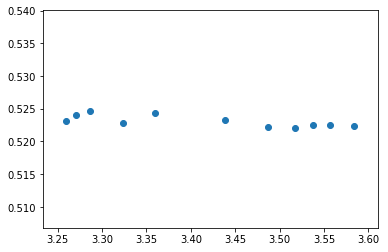

In [184]:
plt.scatter(PAN_IPEC, PAN_concordance)
plt.savefig(MODEL + '_results/' + MODEL + REDUCED + '_0.png')


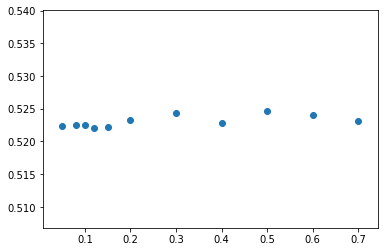

In [185]:
plt.scatter(value, PAN_concordance)


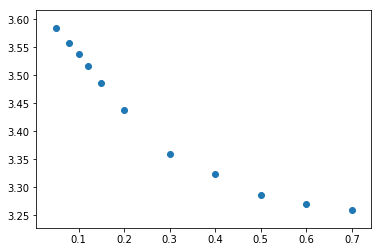

In [186]:
plt.scatter(value, PAN_IPEC)


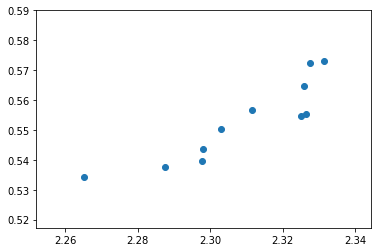

In [187]:
plt.scatter(ICH_IPEC, ICH_concordance)
plt.savefig(MODEL + '_results/' + MODEL + REDUCED + '_1.png')


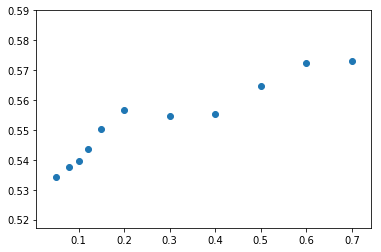

In [188]:
plt.scatter(value, ICH_concordance)


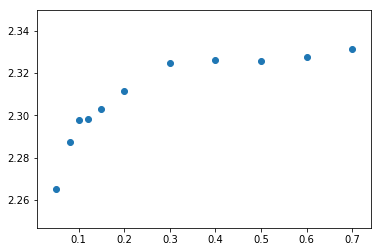

In [189]:
plt.scatter(value, ICH_IPEC)


### Sepsis


In [115]:
with open(MODEL + '_results/' + MODEL + REDUCED + '_2.pickle', 'rb') as f:
    result = pickle.load(f)
    value = result[0]
SEP_concordance = list(result[1]["sepsis"])
SEP_IPEC = list(result[2]["sepsis"])
print(value)
print("SEP:")
print("concordance:")
print(SEP_concordance)
print("best on concordance:")
print("coefficient:", value[np.argmax(SEP_concordance)], "| concordance:", np.max(SEP_concordance))
print("IPEC:")
print(SEP_IPEC)
print("best on IPEC:")
print("coefficient:", value[np.argmin(SEP_IPEC)], "| IPEC:", np.min(SEP_IPEC))


FileNotFoundError: [Errno 2] No such file or directory: 'COX_results/COX_P_2.pickle'

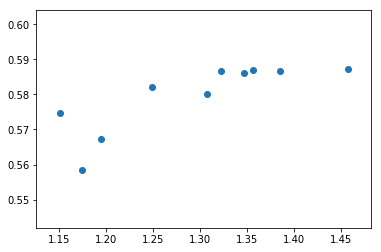

In [104]:
plt.scatter(SEP_IPEC, SEP_concordance)
plt.savefig(MODEL + '_results/' + MODEL + REDUCED + '_2.png')


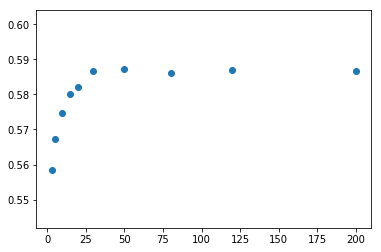

In [105]:
plt.scatter(value, SEP_concordance)


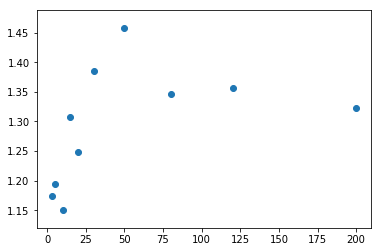

In [106]:
plt.scatter(value, SEP_IPEC)
